<a href="https://colab.research.google.com/github/AzadMehedi/ML-Algorithoms/blob/main/kNearestNeighbors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This dataset is divided into four classes based on address, age, marital status, age of employment, gender, income etc. of customers/phone users of telecom companies. The classes are 
- 1- Basic Service 
- 2- E-Service 
- 3- Plus Service and 
- 4- Total Service.


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import NullFormatter
import matplotlib.ticker as ticker
%matplotlib inline

from sklearn.neighbors import KNeighborsClassifier  
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings('ignore')

In [2]:
url = 'https://raw.githubusercontent.com/FazlyRabbiBD/Data-Science-Book/master/data-telecom-customer.csv'
df = pd.read_csv(url)
df.head()

,region,tenure,age,marital,address,income,ed,employ,retire,gender,reside,custcat
0,2,13,44,1,9,64.0,4,5,0.0,0,2,1
1,3,11,33,1,7,136.0,5,5,0.0,0,6,4
2,3,68,52,1,24,116.0,1,29,0.0,1,2,3
3,2,33,33,0,12,33.0,2,0,0.0,1,1,1
4,2,23,30,1,9,30.0,1,2,0.0,0,4,3


In [3]:
df.shape

(1000, 12)

In [4]:
# target and feature variable
X = df[['region', 'tenure','age', 'marital', 'address', 'income', 'ed', 'employ','retire', 'gender', 'reside']]
y = df['custcat']

In [5]:
# train and test the df
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)
print('Train Set: ', X_train.shape, y_train.shape)
print('Test Set: ', X_test.shape, y_test.shape) 

Train Set:  (750, 11) (750,)
Test Set:  (250, 11) (250,)


In [10]:
# lets fix a range for k value. that means range of minimum and maximum values for optimal k value

k_range = range(1, 26)
scores = []
# we use a loop through the range 1 to 26
# we apped the score in the dictionary

for k in k_range:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  predictions = knn.predict(X_test)
  scores.append(metrics.accuracy_score(y_test, predictions))
print(scores)

[0.268, 0.292, 0.272, 0.26, 0.304, 0.292, 0.34, 0.34, 0.332, 0.308, 0.3, 0.288, 0.292, 0.288, 0.296, 0.3, 0.296, 0.316, 0.324, 0.324, 0.324, 0.324, 0.332, 0.336, 0.344]


Text(0, 0.5, 'Testing Accuracy')

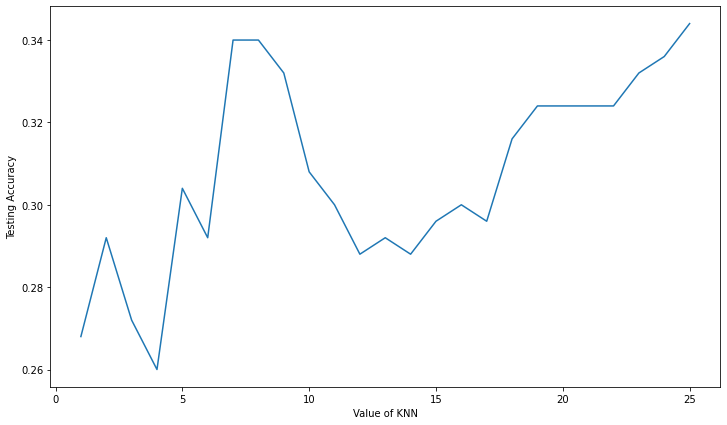

In [14]:
plt.figure(figsize=(12,7))
plt.plot(k_range, scores)
plt.xlabel('Value of KNN')
plt.ylabel('Testing Accuracy')

- we can see for k=7, accuracy is maximum.
- so lets assine k=7.

In [17]:
k = 7

# Train Model and Predict
neighbor = KNeighborsClassifier(n_neighbors=k).fit(X_train, y_train)
neighbor

KNeighborsClassifier(n_neighbors=7)

In [22]:
# check the Accuracy of KNN model

predictions = neighbor.predict(X_test)
print('Classification Report: \n', classification_report(y_test, predictions))
print('Confusion Matrix: \n', confusion_matrix(y_test, predictions))
print('Accuracy Score: ', accuracy_score(y_test, predictions))

Classification Report: 
               precision    recall  f1-score   support

           1       0.34      0.53      0.41        64
           2       0.36      0.29      0.32        51
           3       0.34      0.36      0.35        70
           4       0.31      0.17      0.22        65

    accuracy                           0.34       250
   macro avg       0.34      0.34      0.33       250
weighted avg       0.34      0.34      0.33       250

Confusion Matrix: 
 [[34 10 14  6]
 [10 15 17  9]
 [27  9 25  9]
 [29  8 17 11]]
Accuracy Score:  0.34


### out Accuracy score is 35%

In [29]:
# predict new observation

new_observation = [[2,11,0,22,0,1,40,3,5,0,1]]
neighbor.predict(new_observation)

array([1])

our new customer is 1. that is Basic Service